### Noah Pishaki - PHYS 490

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Problem 1

Iterate through a list xs in reverse, printing out both the index (which will be decreasing) and each element itself.

In [8]:
xs = []
ys = []
zs = []

Setting up the initial list:

In [9]:
for i in range(10):
    xs.append(i)
    print(i, xs)

0 [0]
1 [0, 1]
2 [0, 1, 2]
3 [0, 1, 2, 3]
4 [0, 1, 2, 3, 4]
5 [0, 1, 2, 3, 4, 5]
6 [0, 1, 2, 3, 4, 5, 6]
7 [0, 1, 2, 3, 4, 5, 6, 7]
8 [0, 1, 2, 3, 4, 5, 6, 7, 8]
9 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


zs list using for Loop & Slicing:

list[< start >:< stop >:< step >] => setting the slicing parameters to [ : : -1 ] will iterate through the whole list in -1 steps each iteration.

In [10]:
# reverse order
for item in xs[::-1]:
    ys.append(item)
    print(item, ys)

9 [9]
8 [9, 8]
7 [9, 8, 7]
6 [9, 8, 7, 6]
5 [9, 8, 7, 6, 5]
4 [9, 8, 7, 6, 5, 4]
3 [9, 8, 7, 6, 5, 4, 3]
2 [9, 8, 7, 6, 5, 4, 3, 2]
1 [9, 8, 7, 6, 5, 4, 3, 2, 1]
0 [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


zs list using for loop & built in reverse command:

In [11]:
# reverse order
for item in reversed(xs):
    zs.append(item)
    print(item, zs)

9 [9]
8 [9, 8]
7 [9, 8, 7]
6 [9, 8, 7, 6]
5 [9, 8, 7, 6, 5]
4 [9, 8, 7, 6, 5, 4]
3 [9, 8, 7, 6, 5, 4, 3]
2 [9, 8, 7, 6, 5, 4, 3, 2]
1 [9, 8, 7, 6, 5, 4, 3, 2, 1]
0 [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


# PROBLEM 2 

Try to reproduce the electric field plot shown below with 4 point charges, at (10,0), (-10,0), (0,10), (0,-10). (You should first determine the sign of the charges, assusming they all have the same magnitude.) 

Objective:

![Given Field](https://pengyangraul.github.io/phys490/homework2.png)

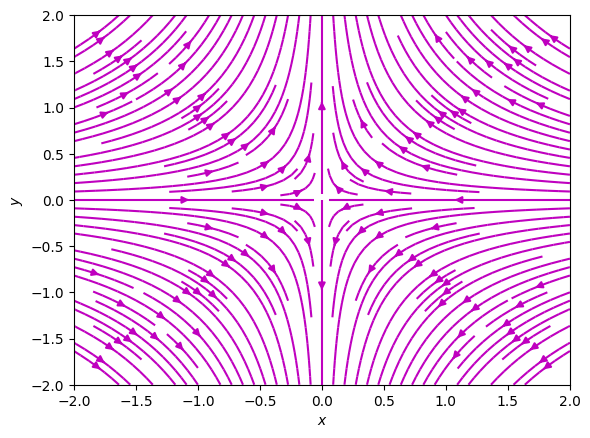

In [12]:
def makefield(rlist, qtopos): # rlist is a list of lists of x,y coordinates
    Es = [] # list of lists of E field components
    for r in rlist: # r is a list of x,y coordinates
        x,y = r # unpack x,y coordinates
        Ex = 0 # initialize E field components
        Ey = 0 
        for q_pos in qtopos: # q_pos is a list of charge and position
            q,pos = q_pos  # unpack charge and position
            posx, posy = pos # unpack position
            R = sqrt((x - posx)**2 + (y - posy)**2) # distance from charge
            Ex += q*(x - posx)/R**3 # add contribution to E field
            Ey += q*(y - posy)/R**3 # add contribution to E field
        Es.append(np.array([Ex,Ey])) 
    return Es # return list of E fields

def plotfield(boxlx,boxly, n, m, qtopos= [[1,(-10,0)], [1,(10,0)], [-1,(0,10)], [-1,(0,-10)]]): # default charges and positions
    xlist = [-boxlx + i*2*boxlx/(n-1) for i in range(n)] # list of x coordinates
    ylist = [-boxly + i*2*boxly/(m-1) for i in range(m)] # list of y coordinates
    rlist = [[x,y] for y in ylist for x in xlist] # list of lists of x,y coordinates
    Es = np.array(makefield(rlist,qtopos)) # list of E fields
    xlist=np.array(xlist) # convert to numpy arrays
    ylist=np.array(ylist) # convert to numpy arrays
    Exs=np.reshape(Es[:,0],(m,n)) # reshape to 2D array
    Eys=np.reshape(Es[:,1],(m,n)) # reshape to 2D array

    # plot field
    plt.streamplot(xlist, ylist, Exs, Eys, density=1.5, color='m')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.show() 
  
plotfield(boxlx = 2, boxly = 2,n = 40, m = 20) # plot E field